#### Sales Prediction for Big Mart Outlets

* Second part conatins predictive analytics, feature importance, model interpretability and recommendation

* Models/algorithms that I have applied for this problem

1. Simple baseline model
2. Linear regreesion with L1 regularisation
3. Linear regression with L2 regularisation
4. Decision tree regressor
5. Random forest (ensemble) regressor
6. XG Boost (gradient boosting ensemble) regressor
7. Advance ensemble (hybrid model) regressor
8. Deep learning (neural network besed model MLP)

#### Model importance and model interpretability to check how model is working 

* Feature imporatance
* Advanced model interpretability using LIME 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Big_mart_sales/pp_train.csv')

In [ ]:
df.head()

Unnamed: 0  ...  outlet_location_type_Tier 3
0           0  ...                            0
1           1  ...                            1
2           2  ...                            0
3           3  ...                            1
4           4  ...                            1

[5 rows x 66 columns]

In [ ]:
df = df.iloc[: , 1:]

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Big_mart_sales/pp_test.csv')

In [ ]:
test.shape

(5681, 32)

In [ ]:
test.head()

Unnamed: 0  ...  outlet_location_type_Tier 3
0           0  ...                            0
1           1  ...                            0
2           2  ...                            1
3           3  ...                            0
4           4  ...                            1

[5 rows x 32 columns]

In [ ]:
test = test.iloc[: , 1:]

In [ ]:
test.head()

item_fat_content  ...  outlet_location_type_Tier 3
0                 4  ...                            0
1                 1  ...                            0
2                 4  ...                            1
3                 4  ...                            0
4                 3  ...                            1

[5 rows x 31 columns]

#### take 1420 datapoints for public 

In [ ]:
test_25 = pd.read_csv('/content/drive/MyDrive/Big_mart_sales/pp_test.csv', nrows=1420)

In [ ]:
test_25.shape

(1420, 32)

In [ ]:
test_75 = pd.read_csv('/content/drive/MyDrive/Big_mart_sales/pp_test.csv', nrows=4261)

In [ ]:
test_75.shape

(4261, 32)

## Defining Metric

* Root mean squared error (RMSE)

## Train-test split

In [ ]:
df.head()

item_fat_content  ...  outlet_location_type_Tier 3
0                 4  ...                            0
1                 3  ...                            1
2                 4  ...                            0
3                 3  ...                            1
4                 4  ...                            1

[5 rows x 65 columns]

In [ ]:
df.shape

(8523, 65)

In [ ]:
df_y = df['item_outlet_sales_x_x_x']

df = df.drop(['item_outlet_sales_x_x_x', 'outlet_establishment_year'], axis=1)

In [ ]:
df.head()

item_fat_content  ...  outlet_location_type_Tier 3
0                 4  ...                            0
1                 3  ...                            1
2                 4  ...                            0
3                 3  ...                            1
4                 4  ...                            1

[5 rows x 63 columns]

In [ ]:
df_y.columns =['item_outlet_sales']
df_y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: item_outlet_sales_x_x_x, dtype: float64

In [ ]:
#Splitting the data into Train and Validation set
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(df,df_y,test_size=1/3, random_state=0)

#### Baseline model: Mean Prediction

In [ ]:
mean_pred = np.repeat(ytrain.mean(),len(ytest))

sqrt(mean_squared_error(ytest, mean_pred))

1730.8211102660823

#### Ridge Regression (L2 reg)

In [ ]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {"alpha":[0.00000001,0.00001,0.0001,0.001,0.01,0.1,0,1,10,100,1000,10000,100000]}
ridgeReg = Ridge(solver = "lsqr", fit_intercept=False)
lr_reg = GridSearchCV(ridgeReg,param_grid =parameters,n_jobs=-1)
lr_reg.fit(xtrain, ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=False,
                             max_iter=None, normalize=False, random_state=None,
                             solver='lsqr', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-08, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0, 1,
                                   10, 100, 1000, 10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
lr_reg.best_params_

{'alpha': 100000}

In [ ]:
ridgeReg = Ridge(alpha=100000,solver = "lsqr", fit_intercept=False )
ridgeReg.fit(xtrain, ytrain)
y_pred = ridgeReg.predict(xtest)

In [ ]:
ridge_RMSE = np.sqrt(mean_squared_error(ytest, y_pred))
print(' Fold %02d Ridge RMSE: ', ridge_RMSE)

 Fold %02d Ridge RMSE:  1093.4060056726396


In [ ]:
#ridgeReg = Ridge(alpha=100000,solver = "lsqr", fit_intercept=False )
#ridgeReg.fit(xtrain, ytrain)
#predridge2 = ridgeReg.predict(test_25)

#### Lasso Regression (L1 reg)

In [ ]:
parameters = {"alpha":[0.00000001,0.00001,0.0001,0.001,0.01,0.1,0,1,10,100,1000,10000,100000]}
lassoReg = Lasso(fit_intercept=False)
lr_reg = GridSearchCV(lassoReg,param_grid =parameters,n_jobs=-1)
lr_reg.fit(xtrain, ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=False,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-08, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0, 1,
                                   10, 100, 1000, 10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
lr_reg.best_params_

{'alpha': 10}

In [ ]:
lassoReg = Lasso(alpha=10, fit_intercept=False )
lassoReg.fit(xtrain, ytrain)
y_pred = lassoReg.predict(xtest)

In [ ]:
lasso_RMSE = np.sqrt(mean_squared_error(ytest, y_pred))
print(' Fold %02d Lasso RMSE: ', lasso_RMSE)

 Fold %02d Lasso RMSE:  1071.3719746429808


#### Importing Decision Tree Regressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#creating a decision tree instance
dt_clf = DecisionTreeRegressor(random_state=101)

parameters={
            "max_depth" : [4,5,6,7],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           
           "max_features":["auto","log2"],
           }

dt_gridsearch = GridSearchCV(dt_clf,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)           

In [ ]:
dt_gridsearch.fit(xtrain, ytrain)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] max_depth=4, max_features=auto, min_samples_leaf=1 ..............
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, score=-1156392.519, total=   0.0s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1 ..............
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, score=-1121748.956, total=   0.0s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1 ..............
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, score=-1138261.379, total=   0.0s
[CV] max_depth=4, max_features=auto, min_samples_leaf=2 ..............
[CV]  max_depth=4, max_features=auto, min_samples_leaf=2, score=-1156392.519, total=   0.0s
[CV] max_depth=4, max_features=auto, min_samples_leaf=2 ..............
[CV]  max_depth=4, max_features=auto, min_samples_leaf=2, score=-1121748.956, total=   0.0s
[CV] max_depth=4, max_features=auto, min_samples_leaf=2 ..............
[CV]  max_depth=4, max_features=auto, min_samples_le

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, min_samples_leaf=3, score=-1121748.956, total=   0.0s
[CV] max_depth=4, max_features=auto, min_samples_leaf=3 ..............
[CV]  max_depth=4, max_features=auto, min_samples_leaf=3, score=-1138261.379, total=   0.0s
[CV] max_depth=4, max_features=auto, min_samples_leaf=4 ..............
[CV]  max_depth=4, max_features=auto, min_samples_leaf=4, score=-1155724.885, total=   0.0s
[CV] max_depth=4, max_features=auto, min_samples_leaf=4 ..............
[CV]  max_depth=4, max_features=auto, min_samples_leaf=4, score=-1121748.956, total=   0.0s
[CV] max_depth=4, max_features=auto, min_samples_leaf=4 ..............
[CV]  max_depth=4, max_features=auto, min_samples_leaf=4, score=-1138261.379, total=   0.0s
[CV] max_depth=4, max_features=auto, min_samples_leaf=5 ..............
[CV]  max_depth=4, max_features=auto, min_samples_leaf=5, score=-1155724.885, total=   0.0s
[CV] max_depth=4, max_features=auto, min_samples_leaf=5 ..............
[CV]  max_depth=4, max

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    4.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=101,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': 

In [ ]:
# best hyperparameters 
dt_gridsearch.best_params_

{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 8}

In [ ]:
#creating a decision tree instance with new hyperparameter values
tuned_clf = DecisionTreeRegressor(random_state=101, max_depth=6, max_features='auto', min_samples_leaf=8, min_impurity_split=25)

In [ ]:
tuned_clf.fit(xtrain, ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=25,
                      min_samples_leaf=8, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=101, splitter='best')

In [ ]:
# prediction 

y_pred=tuned_clf.predict(xtest)

In [ ]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

RMSE: 1047.134331552112


#### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [ ]:
param_dist = {'n_estimators': [10,50,100,150,160,200,300,350,400,500],
               'min_samples_split': [2,3,5,6,7,8],
               
              
              "max_depth":[None,10,20,40,60,80,100,120]
             
              }
regr1 = RandomForestRegressor()
n_iter_search = 100
regr1 = RandomizedSearchCV(regr1, param_distributions=param_dist,
                                     n_jobs=-1, n_iter=n_iter_search, cv=3)

regr1.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
regr1.best_params_

{'max_depth': 10, 'min_samples_split': 6, 'n_estimators': 100}

In [ ]:
m = RandomForestRegressor(n_jobs=-1,min_samples_split=5,n_estimators=500,max_depth=10)
m.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
predr = m.predict(xtest)
rf_RMSE = np.sqrt(mean_squared_error(ytest, predr))
print(rf_RMSE)

1048.1432751743043


#### Light GBM Regressor

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor
gridParams = {
    'learning_rate': [ 0.1,0.2,0.3,0.4,0.5],
    'n_estimators': [100,150, 200,250,300,400,500],
    'num_leaves': [20,30,63,80,100,120],
    'boosting_type' : ['gbdt'],
    'max_depth' : [2,3,4,5,6,7,8]
}
lgbm_params ={'subsample': 0.9, 'colsample_bytree': 0.8, 'min_child_samples': 50, 'objective': 'regression'
        }
model = LGBMRegressor(**lgbm_params)
# Create the grid
grid = GridSearchCV(model, gridParams, verbose=1, cv=3, n_jobs=-1)
# Run the grid
grid.fit(xtrain, ytrain,verbose=True)

print('Best parameters found by grid search are:', grid.best_params_)
print('Best score found by grid search is:', grid.best_score_)

Fitting 3 folds for each of 1470 candidates, totalling 4410 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 4410 out of 4410 | elapsed: 16.2min finished


Best parameters found by grid search are: {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 20}
Best score found by grid search is: 0.648074935699206


In [ ]:
print('Best parameters found by grid search are:', grid.best_params_)
print('Best score found by grid search is:', grid.best_score_)

Best parameters found by grid search are: {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 20}
Best score found by grid search is: 0.648074935699206


In [ ]:
lgbm_params ={'subsample': 0.9, 'colsample_bytree': 0.8, 'min_child_samples': 50, 'objective': 'regression','boosting_type': 'gbdt','learning_rate': 0.1,'max_depth': 3,'n_estimators': 100,'num_leaves': 20,
      }
model = LGBMRegressor(**lgbm_params)
model.fit(xtrain, ytrain, verbose=True)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
              importance_type='split', learning_rate=0.1, max_depth=3,
              min_child_samples=50, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=20,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=0.9,
              subsample_for_bin=200000, subsample_freq=0)

In [ ]:
pred = model.predict(xtest)

In [ ]:
lgbm_RMSE = np.sqrt(mean_squared_error(ytest, pred))
print(' Fold %02d Ridge RMSE: ', lgbm_RMSE)

 Fold %02d Ridge RMSE:  1018.4327240479698


In [ ]:
model.feature_importances_

array([  6,  35, 107,  15,  38,   2,   1,   0,   0,   0,   3,  13,   6,
         6,  59,  59,   7,   7,   0,   0,   0,   0,   4,   1,   1,   0,
         2,   1,   2,   0,  19, 127,  34,  43,   0,   3,   0,   3,   1,
         0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   2,   0,   0,   0])

#### Ensemble model

In [ ]:
# Train and Test Split
train_X, test_X, train_y, test_y = train_test_split(df, df_y, test_size=0.2, random_state=144)

In [ ]:
def get_rmse(y, pred): return np.sqrt(mean_squared_error(y, pred))

In [ ]:
import lightgbm as lgb

# Define LGBM Model
model_lgb = lgb.LGBMRegressor(num_leaves=31, n_jobs=-1, learning_rate=0.1, n_estimators=500, random_state=42)

# Fit LGBM Model
model_lgb.fit(train_X, train_y)

# Predict with LGBM Model
lgbm_y_pred = model_lgb.predict(test_X)

In [ ]:

# Define Ridge Model
model_ridge = Ridge(solver = "lsqr", fit_intercept=True, random_state=42)
    
# Fit Ridge Model
model_ridge.fit(train_X, train_y)
    
# Evaluate Training Score
ridge_y_pred = model_ridge.predict(test_X)

In [ ]:
ensemble_y_pred = (lgbm_y_pred + ridge_y_pred) / 2

ensemble_rmse = get_rmse(ensemble_y_pred, test_y)

print(f'Ensemble RMSE: {ensemble_rmse:.5f}')

Ensemble RMSE: 1044.48579


In [ ]:
ensemble_y_pred = 0.50 * lgbm_y_pred + 0.75 * ridge_y_pred

ensemble_rmse = get_rmse(ensemble_y_pred, test_y)

print(f'Ensemble RMSE: {ensemble_rmse:.5f}')

Ensemble RMSE: 1200.11316


## Conclusion

In [ ]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "HyperParameters used",  "RMSE"]

x.add_row(["Ridge Regression", "alpha", 1071.3719])
x.add_row(["Lasso Regression", "alpha", 1093.4064])
x.add_row(["Decision Tree", "max_depth, min_samples_leaf, max_feature ", 1047.1343])
x.add_row(["Random Forest Regressor ","n_estimators,min_samples_split,max_depth" ,  1048.3200])
x.add_row(["Light GBM", "learning_rate,n_estimators,boosting_type,num_leaves,max_depth",  1018.4327])
x.add_row(["MLP", "nurons, activation function",  1042.4400])

print(x)

+--------------------------+---------------------------------------------------------------+-----------+
|          Model           |                      HyperParameters used                     |    RMSE   |
+--------------------------+---------------------------------------------------------------+-----------+
|     Ridge Regression     |                             alpha                             | 1071.3719 |
|     Lasso Regression     |                             alpha                             | 1093.4064 |
|      Decision Tree       |                             alpha                             | 1047.1343 |
| Random Forest Regressor  |            n_estimators,min_samples_split,max_depth           |  1048.32  |
|        Light GBM         | learning_rate,n_estimators,boosting_type,num_leaves,max_depth | 1018.4327 |
|           MLP            |                  nurons, activation function                  |  1042.44  |
+--------------------------+---------------------------

## Feature importance & Model interpretability

#### Global Surrogate

In [ ]:
from sklearn import tree


In [ ]:
# creating the decision tree
decision_tree = tree.export_graphviz(tuned_clf, out_file='tree_1.dot', feature_names=xtrain.columns, filled=True, max_depth=2)

In [ ]:
# converting the dot image to png format
!dot -Tpng tree_1.dot -o tree_1.png

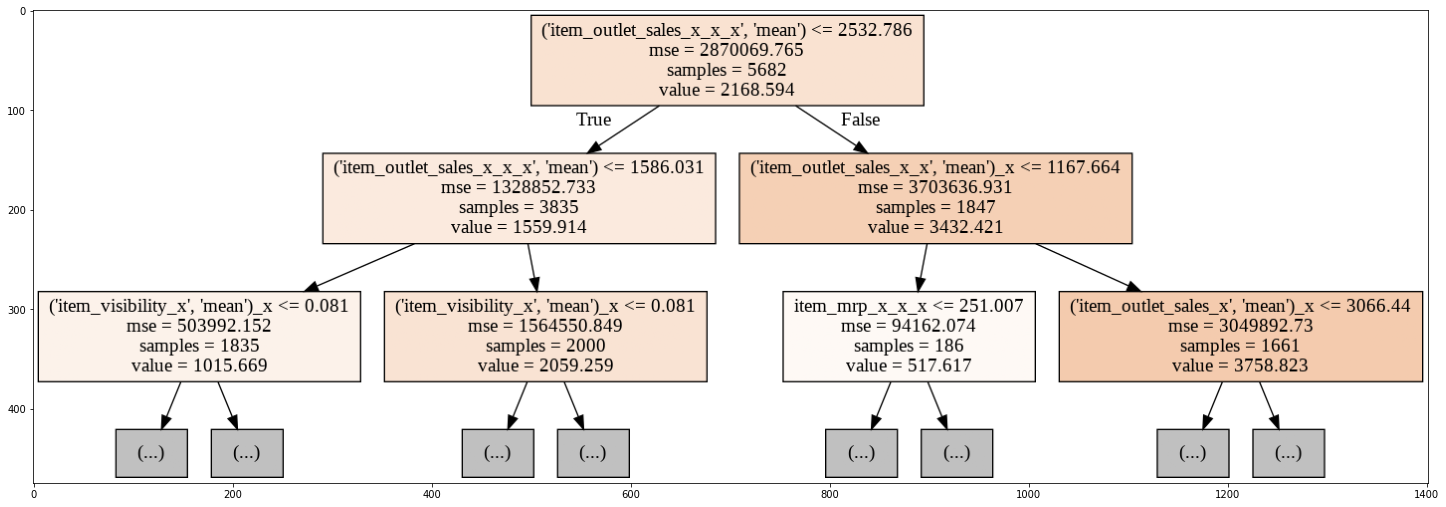

In [ ]:
#plotting the decision tree
image = plt.imread('tree_1.png')
plt.figure(figsize=(25,25))
plt.imshow(image)

In [ ]:
# feature importance of the decision tree model
feature_importance = pd.DataFrame()
feature_importance['variable'] = xtrain.columns
feature_importance['importance'] = tuned_clf.feature_importances_

In [ ]:
# feature_importance values in descending order
feature_importance.sort_values(by='importance', ascending=False).head()

variable  importance
31  ('item_outlet_sales_x_x_x', 'mean')    0.592631
23  ('item_outlet_sales_x_x', 'mean')_x    0.165691
16      ('item_visibility_x', 'mean')_x    0.124016
15    ('item_outlet_sales_x', 'mean')_x    0.068930
2                        item_mrp_x_x_x    0.028864

#### LIME

In [ ]:
# installing lime library
!pip install lime

     |████████████████████████████████| 276kB 28.6MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=d5cee2d6d992a1c24099e45662e661584b7e314604589337ee6a885874cad935
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
# import Explainer function from lime_tabular module of lime library
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
# creating the explainer function
explainer = LimeTabularExplainer(xtrain.values, mode="regression", feature_names=xtrain.columns)

In [ ]:
# storing a new observation
i = 6
X_observation = xtest.iloc[[i], :]
X_observation

item_fat_content  ...  outlet_location_type_Tier 3
7230                 3  ...                            1

[1 rows x 63 columns]

In [ ]:
# printing the true value, linear regression, random forest, decision tree predictions for the above observation
print(f"""\
* True prediction: {ytest.iloc[i]}
* LR prediction: {lassoReg.predict(X_observation)[0]}
* DT prediction: {tuned_clf.predict(X_observation)[0]}
* RF prediction: {m.predict(X_observation)[0]}
* LightGBM prediction: {model.predict(X_observation)[0]}""")

* True prediction: 2036.6822
* LR prediction: 2641.151698800947
* DT prediction: 1670.785152
* RF prediction: 2084.7023989787476
* LightGBM prediction: [5836559.]


In [ ]:
# testing our custom function to make sure it generates propabilities properly
explanation = explainer.explain_instance(X_observation.values[0], lassoReg.predict)

In [ ]:
# visualizing the interpretations
explanation.show_in_notebook(show_table=True)

In [ ]:
# accessing the coefficients, intercept R squared and the predicted value
print(explanation.local_exp)
print(explanation.intercept)
print(explanation.score)
print(explanation.predicted_value)

{0: [(2, 1511.7792435455099), (31, 1469.1227058861718), (33, -1219.381780421079), (23, -691.128724371824), (15, -689.0508611320856), (36, -296.38758813294663), (48, 125.76411891023929), (19, 116.0937514705958), (55, 104.7315109814373), (41, -94.1185149353108)], 1: [(2, -1511.7792435455099), (31, -1469.1227058861718), (33, 1219.381780421079), (23, 691.128724371824), (15, 689.0508611320856), (36, 296.38758813294663), (48, -125.76411891023929), (19, -116.0937514705958), (55, -104.7315109814373), (41, 94.1185149353108)]}
{0: 2127.0614894799783, 1: 2127.0614894799783}
0.5319661616265412
2641.1516988009466


In [ ]:
# explanation using the decision tree model
explanation = explainer.explain_instance(X_observation.values[0], tuned_clf.predict)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

0.2906683835597673


In [ ]:
# explanation using the random forest model
explanation = explainer.explain_instance(X_observation.values[0], m.predict)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

0.43482433259265296


In [ ]:
# explanation using the random forest model
explanation = explainer.explain_instance(X_observation.values[0], model.predict)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

0.48437002794635486


#### Conclusion & Recommendation

* As we can see from the feature imporatance that feature engineering is the most impotant aspect of the data science life cycle. feature engineering is the process of creating new fetaures from the existing features.

* Here is the top features which are very imporatant to predict sales

1. Target encoded feature item identifier
2. Target encoded feature outlet type
3. Target encoded feature product mrp
4. Target encoded feature product visibility

* Out of all the model that we have applied we can go with the random forest as it gives very good accuracy and very easy to deploy since it is trivialy paralellised algorithm. If we have more data then we can go with advance XGboost models such as Light GBM. 

